# Del 2: Rydd datasettet

*Nedbørsoppgavene Del 1 til 5 er laget som støtte-oppgaver til oppgaven "Nedbør i Norge". Oppgaven "Nedbør i Norge" er en lengre oppgave som kommer innom mange forskjellige programerings-elementer. Intensjonen er at hvis man først gjør deloppgavene 1 til 5 og så går gjennom det nokså omfattende eksempelet på starten av oppgaven "Nedbør i Norge" så vil det programeringstekniske i oppgaven "Nedbør i Norge" være repetisjon, slik at man kan fokusere på den naturvitenskaplige tolkningen av dataene. På denne måten får man både trening i programmering og erfaring med hvordan det kan brukes til å studere og forstå naturvitenskaplige prosesser.*

-------------

I denne oppgaven går vi gjennom et eksempel på:
- Hvordan man kan gå frem for å få oversikten over datasettet man skal bruke, og
- Hvordan man kan rydde i datasettet om nødvendig (og når og hvorfor det i blant er nødvendig).

Når man jobber med datasett med observasjoner fra naturen er det ofte slik at man mangler et par verdier. Har man f.eks. en gammel tidsserie over snødybde på et gitt sted kan det være at en dag mangler fordi det var storm og utrygt å gå ut for å måle snødybden. I dag har vi mange metoder for å automatisk hente inn data, men hull kan likevel oppstå i et datasett. Et skydekke vil hindre noen satellitter i å ta målinger, en alge kan legge seg over en sensor i havet og bli skylt vekk av en sterk strøm dager eller uker seinere, og en is- eller sediment-kjerne kan knekke nettopp der du hadde tenkt å bore et hull for å måle temperatur. Mye kan skje, og det er viktig å sjekke om datasettet du skal bruke er "good to go" eller om det krever en gjennomgang først. 

I dette eksempelet bruker vi en tidsserie over temperatur i Bergen siden 1861. Datasettet har to kolonner: år og gjennomsnitlig års-temperatur.

#### Last inn pakkene som trengs

In [1]:
import numpy as np # for matematikk, filinnlasting mm.
import matplotlib.pyplot as plt # for figurer

import sys
# Bytt ut stien under slik at den peker på hvor på din PC du har 
# lagret mappen "Funksjoner".
sys.path.append(r"W:\Work\Documents\EkteData\EkteData\Funksjoner")
from EkteDataFunk import loadData # for filinnlasting

#### 1. Last inn datasettet. 

Vi bruker funksjonen loadData som ligger i GitHub mappen til Ekte Data. Vi setter `rydd = 'N'` for at funksjonen ikke skal rydde datasettet automatisk. 


In [2]:
file='TempBergenYearly.txt'
data = loadData(file, rydd='N')


Nå er filen lastet inn, og innholdet er lagret i variabelen `data`. Vi skriver den ut for å sjekke hvordan dataene våre er strukturert.

In [ ]:
data

#### Oppgave 1. 
**Studer outputtet og undersøk punktene:**
- Hva beskriver kolonne en og to?
- Hva er dimensjonene til datasettet?
- Finnes det Nan-verdier eller andre verdier som representerer at data mangler?

For å svare på punkt 1 er det lurt å åpne filen i notepad fordi det ofte er en *header* i .txt-filer som dette. I første linje til denne filen står det *Year* og *Temperature*, altså *år* og *temperatur*. Kolonne en er år, kolonne to er nedbør. Det varierer litt fra filformat til filformat hvor informasjon som dette ligger, og det er heller ikke alltid datafiler har en tydelig header. Men stort sett er dette lett tilgjengelig informasjon, og i datasettene vi bruker her vil det alltid enten være en header, eller så vil det stå i oppgaveteksten.

`data.shape` gir oss dimensjonene til `data`: `161 x 2`. Matrisen (arrayet) `data` har 161 rader og 2 kolonner.

In [4]:
data.shape

(161, 2)

#### 2. Lagre dataene til variables
For å gjøre datasettet enklere å jobbe med lagrer vi tid-kolonnen i vektoren `tid`, og temperatur-kolonnen i vektoren `temp`.  

In [5]:
tid=data[:,0]
temp=data[:,1]

#### 3. Lag en figur
Nå som vi vet hva datasettet vårt inneholder kan vi beregne gjennomsnittstemperatur over alle årene og lage en figur.

In [7]:
np.mean(temp)

-105.0359420289855

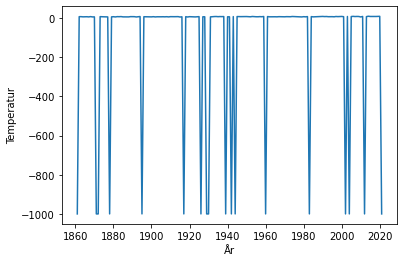

In [6]:
plt.plot(tid, temp)
plt.xlabel('År')
plt.ylabel('Temperatur')
plt.show()

#### 4. Fyll-verdier og behandling av fyll-verdier
Dette ser veldig rart ut. Ser vi tilbake på tabellen med dataverdier over, så ser vi at det står -999.99 flere steder. Den laveste teoretiske temperaturen man kan ha er -273.15. Dette finnes ikke naturlig, og i allefall ikke i Bergen. Disse verdiene må altså være fyll-verdier som er satt inn fordi data mangler. Ved å sette inn slike verdier blir datasettet lett å jobbe med til tross for manglende verdier. Det hadde vært mye mer knotete om disse årene bare ble tatt ut. Da kunne man plutselig ha et hopp i tid fra f.eks 1923 til 1927 som man måtte identifisere før man kunne f.eks. plotte og analysere dataene. 

Dette oppsettet med fyll-verdier krever imidlertid litt opprenskning det også. Det enkleste er å sette alle steder med -999.99 til `NaN`. `NaN` står for "Not a Number" og en er placeholder for manglende verdier. Å bruke `NaN` som fyll-verdi er praktisk fordi det er lett å utelukke NaN-verdiene i beregninger med `Numpy`-biblioteket: På samme måte som kan beregne gjennomsnitt med `np.mean(x)` eller standardavvik med `np.std(x)` dersom `x` ikke inneholder fyll-verdier, kan man bruke `np.nanmean` og `np.nanstd` for å utelukke alle steder med `NaN` som fyllverdi i beregningen av for eksempel gjennomsnitt og standaravvik. Det er også lett å lage figurer uten at man risikerer hopp i tid når man bruker `NaN` som fyllverdi.

#### 5. Sett alle tilfeller av -999.99 til `NaN`

**Metode 1 - np.where().**
Husk fra forrige oppgave der vi fant alle indeksene til år mellom 1873 og 1947 som vi så ga tilbake til vektoren `tid` og `temp` for å velge ut temperatur de rette årene. Tilsvarende kan vi finne indeksen til alle verdiene i `temp` som nå er `-999.99`.

In [12]:
id999=np.where(temp==-999.99)
id999

(array([  0,  10,  11,  17,  34,  56,  65,  68,  69,  78,  81,  83,  99,
        122, 141, 143, 151, 160], dtype=int64),)

Temperaturverdiene på alle disse indeksene erstatter man med `NaN` som dette:

In [17]:
temp[id999]=np.nan

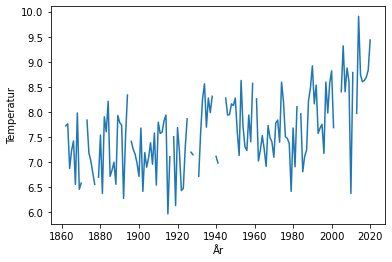

In [18]:
# Nå dukker plutselig variabiliteten til temperatur opp!
plt.plot(tid, temp)
plt.xlabel('År')
plt.ylabel('Temperatur')
plt.show()

**Metode 2 - Logisk indeksering.**
Vi kan også sette -999.99 til `NaN` uten å bruke funksjonen `np.where()`: vi kan bruke *logisk indeksering*. Logisk indeksering vil si at man setter et kriterie, og sjekker om veridene i en variabel tilfredstiller kriteriet eller ikke. Svaret et alltid `True` eller `False` som tilsvarer `1` eller `0`. Et kort eksempel viser dette best:

In [19]:
x=np.array([2,4,1,5,3,6]) # et array (i dette tilfellet en vektor)
print(x)

# Det doble likhetstegnet betyr at vi bruker logisk indeksering: 
# "For alle elementer i x, sjekk om ellementet er lik 4"
# Resultatet er et array med like dimensjoner som x, men alle 
# elementene er "True" eller "False". I dette eksempelet er kun 
# element nr 1 "True", altså er x[1]=4. 
print(x==4) 

[2 4 1 5 3 6]
[False  True False False False False]


Dette er veldig nyttig når man skal gjøre noe med elementer som tilfredstiller et kriterie. Vil vi for eksempel at alle elementer som er 4 skal være 7 i stedet kan vi bruke den logiske rekken vår og si at der denne er "True" skal verdien byttes til 7. 

In [20]:
ind = x==4 # Lagre den logiske vektoren som en variabel "ind" (for indeks)
x[ind]=7 # Sett elementene i x der ind=True til 7
x

array([2, 7, 1, 5, 3, 6])

In [21]:
# Dette kan også komprimeres til en linje
x=np.array([2,4,1,5,3,6]) 
x[x==4]=7 # "der x=4 skal verdien byttes til 7"
x

array([2, 7, 1, 5, 3, 6])

Hvis man vil ha tak i selve indeksen kan man igjen bruke `np.where()`. 
I dette tilfelle er det imidlertid en litt mer knotete metode, men det viser at mye kan gjøres på mange ulike måter. 

In [22]:
x=np.array([2,4,1,5,3,6]) 
ind=np.where(x==4)
x[ind[0][0]]=7
x

array([2, 7, 1, 5, 3, 6])

Vi må bruke `ind[0][0]` av samme grunn som notatet i Oppgave 7 fra Del 1: Indeksering, altså for å komme på innsiden av parantesene som er rundt `ind`. Kjør cellen under for å se tydeligere hva som er forskjellen på `ind`, `ind[0]`, og `ind[0][0]`.

In [23]:
print(ind)
print(ind[0])
print(ind[0][0])

(array([1], dtype=int64),)
[1]
1


#### Sett fyll-verdien `-999.99` til `NaN`
Vi kan nå bruke logisk indeksering på datasettet vårt og si at "der `x=-999.99` skal verdien byttes til `NaN`"

In [ ]:
data[data==-999.99]=np.nan
temp=data[:,1]

In [ ]:
data


Hvis vi nå plotter dataene igjen får vi mye mer informasjon. All variabiliteten (høye of lave verdier, trender etc.) vi ser her fantes også i den første figuren, men det ble overskygget av -999.99 verdiene. Hadde vi zoomet inn på y-aksen, f.eks. satt `plt.ylim([6,10])`, ville vi fått noe som lignet på figuren under. 

Det er noen hull i figuren under, spesielt rundt 1940, men slik er det i blant - man har ikke alltid et fullstendig datasett - og dette gir oss likevel et godt inntrykk av temperatur mellom 1860 og 2020. Man kan estimere verdier som mangler med interpolasjon - sjekk oppgaven [Del6: databehandling av egne data](https://github.com/irendundas/EkteData/blob/main/Level1_Temperaturoppgaven/Del6_databehandling_av_egne_data.ipynb) for et eksempel på dette. 

In [ ]:
plt.plot(tid, temp)
plt.xlim([1860,2021])
plt.xlabel('År')
plt.ylabel('Temperatur')
plt.show()

Datasettet er nå klart til at vi kan sette igang å jobbe med det. I tillegg har vi fått oversikten over dimensjonene til datasettet og hva kolonnene inneholder.
__________________________

#### Oppgave 2.

Gitt arrayet x under. Gjør slik at det istedet står 100 alle de stedene hvor det nå står 2.

In [ ]:
x=np.array([2,4,2,1,5,7,7,3,6,0,5,2,4,6,5,2,5,78,6,4,2,1,3,2,4])

#### Oppgave 3.
Gitt arrayet x under. Gjør slik at det står 100 alle stedene det står 7 i den andre kolonnen. Kolonne nr 1 skal ikke endre seg.

In [ ]:
x=np.array([[2,1,3,5,7,3,6,8,0,7],[2,7,8,6,5,6,8,8,7,7]])

#### Oppgave 4.
Prøv deg frem med datasettet: `PrecipVestlandYearly.txt`. Det ligner, men er ikke helt likt som det i eksempelet over. Lag en figur og beregn gjennomsnittet. Hva er fyll-verdien i dette datasettet? Erstatt fyll-verdiene med `NaN` og lag figuren og beregn gjennomsnittet på nytt. 